COVID19 FORECAST -- Googleの予測値
==============
-------------


ここではGoogleの予測値を取得します。

[Google COVID-19 感染予測(日本版)](https://datastudio.google.com/u/0/reporting/8224d512-a76e-4d38-91c1-935ba119eb8f/page/ncZpB?s=nXbF2P6La2M)
こちらのリンクからGoogleが公表している28日後までの予測値をcsvファイルの形式でダウンロードできます。  
私が2020/12/02にダウンロードしたcsvファイルが、['google1129_1226.csv']() です。（予測対象期間は2020/11/29 ~ 2020/12/26）  
こちらの中身を確認し、Googleの予測値の部分を抽出してcsvに保存します。

手順
+ 1. 中身の確認
+ 2. 必要な形に加工
+ 3. 予測値の部分を抽出してcsvに保存

## 1. 中身の確認

In [10]:
import pandas as pd
data = pd.read_csv('google1129_1226.csv')
data

,japan_prefecture_code,prefecture_name,target_prediction_date,cumulative_confirmed,cumulative_confirmed_q0025,cumulative_confirmed_q0975,cumulative_deaths,cumulative_deaths_q0025,cumulative_deaths_q0975,hospitalized_patients,...,cumulative_confirmed_ground_truth,cumulative_deaths_ground_truth,hospitalized_patients_ground_truth,recovered_ground_truth,forecast_date,new_deaths,new_confirmed,new_deaths_ground_truth,new_confirmed_ground_truth,prefecture_name_kanji
0,JP-01,HOKKAIDO,2020-11-29,9274.373047,9235.071289,9428.350586,188.909027,188.278839,189.472717,2838.417969,...,NaN,NaN,NaN,NaN,2020-11-28,4.958740,754.533203,NaN,NaN,北海道
1,JP-01,HOKKAIDO,2020-11-30,9528.189453,9451.532227,9824.212891,193.757034,192.529160,194.838837,2867.828613,...,NaN,NaN,NaN,NaN,2020-11-28,4.848007,253.816406,NaN,NaN,北海道
2,JP-01,HOKKAIDO,2020-12-01,9789.341797,9677.083984,10217.986328,198.574341,196.779633,200.134964,2909.536133,...,NaN,NaN,NaN,NaN,2020-11-28,4.817307,261.152344,NaN,NaN,北海道
3,JP-01,HOKKAIDO,2020-12-02,10061.214844,9914.889648,10612.352539,203.384094,201.051636,205.386627,2937.002930,...,NaN,NaN,NaN,NaN,2020-11-28,4.809753,271.873047,NaN,NaN,北海道
4,JP-01,HOKKAIDO,2020-12-03,10344.734375,10165.671875,11010.953125,208.164612,205.322189,210.554031,2979.739990,...,NaN,NaN,NaN,NaN,2020-11-28,4.780518,283.519531,NaN,NaN,北海道
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,JP-47,OKINAWA,2020-11-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4031.0,68.0,304.0,3664.0,2020-11-28,NaN,NaN,0.0,16.0,沖縄県
15976,JP-47,OKINAWA,2020-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4057.0,68.0,303.0,3691.0,2020-11-28,NaN,NaN,0.0,26.0,沖縄県
15977,JP-47,OKINAWA,2020-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4131.0,68.0,351.0,3717.0,2020-11-28,NaN,NaN,0.0,74.0,沖縄県
15978,JP-47,OKINAWA,2020-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4169.0,68.0,362.0,3744.0,2020-11-28,NaN,NaN,0.0,38.0,沖縄県


              カラムの説明

| 列名       | データ型     | 説明         |
|:-----------|------------:|:------------:|
| japan_prefecture_code | STRING | 都道府県コード。たとえば、北海道は「JP-01」。 |
| prefecture_name       | STRING | 予測対象の都道府県名。                      |
| prediction_date       | DATE   | 予測データまたは過去のデータが参照する日付（YYYY-MM-DD）。|
| cumulative_confirmed  |FLOAT   | 予測される COVID-19 の累計陽性者数。|
| cumulative_confirmed_q0025 | FLOAT | 累計陽性者数の 95% 予測区間の下限（2.5% 分位数）。|
| cumulative_confirmed_q0975 | FLOAT | 累計陽性者数の 95% 予測区間の上限（97.5% 分位数）。|
| cumulative_deaths | FLOAT | prediction_date 以前（当日を含む）の、予測される COVID-19 による累計死亡者数。|
| cumulative_deaths_q0975 | FLOAT | 累計死亡者数の 95% 予測区間の上限（97.5% 分位数）。|
| cumulative_deaths_q0025 | FLOAT | 累計死亡者数の 95% 予測区間の下限（2.5% 分位数）。|
| hospitalized_patients | FLOAT | prediction_date における、予測される COVID-19 による入院・療養等患者数。|
| hospitalized_patients_q0975 | FLOAT  | 入院・療養等患者数の 95% 予測区間の上限（97.5% 分位数）。|
| hospitalized_patients_q0025 | FLOAT | 入院・療養等患者数の 95% 予測区間の下限（2.5% 分位数）。|
| recovered | FLOAT | 予測される COVID-19 からの累計回復者数。|
| recovered_q0975 | FLOAT | 累計回復者の 95% 予測区間の上限（97.5% 分位数）。|
| recovered_q0025 | FLOAT | 累計回復者の 95% 予測区間の下限（2.5% 分位数）。|
| cumulative_confirmed_ ground_truth | FLOAT | COVID-19 陽性者数の報告された実績値の累計。|
| cumulative_death_ground_truth | FLOAT | COVID-19 による死亡者数の報告された実績値の累計。|
| hospitalized_patients_ground_truth | FLOAT | COVID-19 による入院・療養等患者数の報告された実績値。|
| recovered_ground_truth | FLOAT | COVID-19 からの回復者数の報告された実績値の累計。|
| forecast_date | DATE | 予測作成日（YYYY-MM-DD）。|
| new_deaths | FLOAT | prediction_date における、予測される COVID-19 による新規死亡者数。|
| new_confirmed | FLOAT | prediction_date における、予測される COVID-19 の新規陽性者数。|
| new_deaths_ground_truth | FLOAT | 当該日に発生したCOVID-19 による死亡者数の報告された実績値。|
| new_confirmed_ground_truth | FLOAT | 当該日に発生したCOVID-19 による陽性者数の報告された実績値。|

使用されているデータソース
* 厚生労働省が発表している新型コロナウイルス感染症陽性者数および死亡者数などの[オープンデータ](https://www.mhlw.go.jp/stf/covid-19/open-data.html)
* Googleが特定の場所（食料品店、公園など）を訪れた人の数の変化を地域別にまとめた[コミュニティモビリティレポート](https://www.google.com/covid19/mobility/?hl=ja)
* [平成27年国勢調査結果](http://www.stat.go.jp/data/kokusei/2015/)     
  
引用：[COVID-19 感染予測 (日本版) の公開について](https://cloud.google.com/blog/ja/products/ai-machine-learning/google-and-harvard-improve-covid-19-forecasts)

## 2. 必要な形に加工

In [6]:
# 都道府県＆日付ごとに集計されていたので、日付のみでグループ化
grouped = data.groupby("target_prediction_date").agg({"new_confirmed": "sum", "new_confirmed_ground_truth": "sum"})
data_columns = ["Google_predict", "actual"]
grouped.columns = data_columns
grouped[300:]
#予測した時点（11/29）でそれ以降の実績値は不明なので全部0になっています
#正解データ(11/29~12/26の新規陽性者数の実績値)は実績値発表以降に以降に厚生労働省HPから取得

,Google_predict,actual
target_prediction_date,,
2020-11-17,0.000000,1555.0
2020-11-18,0.000000,2164.0
2020-11-19,0.000000,2349.0
2020-11-20,0.000000,2423.0
2020-11-21,0.000000,2446.0
2020-11-22,0.000000,2163.0
2020-11-23,0.000000,1463.0
2020-11-24,0.000000,1481.0
2020-11-25,0.000000,1836.0


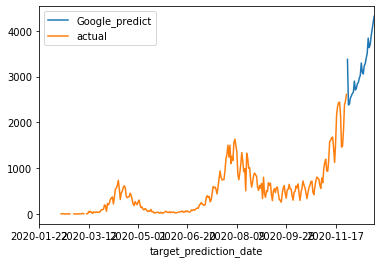

In [7]:
# 可視化してみる
import numpy as np
grouped.replace(0,np.nan).plot()

## 3. 予測値の部分を抽出してcsvに保存

In [8]:
google_result = grouped.iloc[312:, :1]
google_result

,Google_predict
target_prediction_date,
2020-11-29,3377.096664
2020-11-30,2382.346401
2020-12-01,2406.677879
2020-12-02,2534.248775
2020-12-03,2584.985058
2020-12-04,2633.665855
2020-12-05,2663.872444
2020-12-06,2903.424751
2020-12-07,2709.092499


In [11]:
google_result.to_csv('google_predict.csv')